## Low rank demo

Suppose that sources $s_{m}$, $j=1,2,\ldots N$ in $[0,1]^2$ and targets $t_{k}$, $k=1,2,\ldots M$ are in $[R,R+1] \times [0,1]$. 

Suppose the matrix entries are given by
$A_{k,j} = \frac{1}{t_{k} - s_{j}}$

Low rank is often connected to the smoothness of functions. In this context, what it means is the following, for a given collection of charges $c_{j}$, $j=1,2,\ldots N$ consider the function given by

$$ f(t) = \sum_{j=1}^{N} \frac{c_{j}}{t-s_{j}} = A \cdot c $$

Below we plot a few such functions:

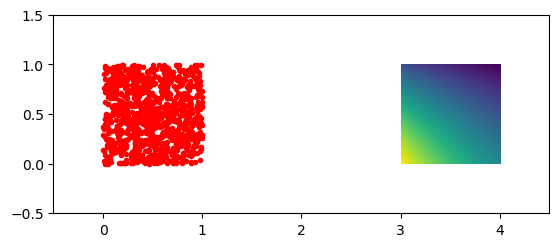

In [1]:
import numpy as np
import pylab as plt
import fmm2dpy as fmm2


R = 3

# Generate random sources
N = 1000
src = np.random.uniform(0,1,(2,N))

# Plot the source locations
plt.plot(src[0,:],src[1,:],'r.')
plt.xlim([-0.5,R+1.5]);
plt.ylim([-0.5,1.5]);

# Generate uniform grid of targets
ntg = 100;
[xtarg,ytarg] = np.meshgrid(np.linspace(R,R+1,ntg),np.linspace(0,1,ntg))
targs = np.zeros((2,ntg*ntg));
targs[0,:]=xtarg.reshape(ntg*ntg,);
targs[1,:]=ytarg.reshape(ntg*ntg,);

# compute field due to random collection of dipoles
dipstr = np.random.uniform(-0.5,0.5,N) + 1j*np.random.uniform(-0.5,0.5,N);
eps = 10**(-5)

out = fmm2.cfmm2d(eps=eps,sources=src,dipstr=dipstr,targets=targs,pg=0,pgt=1)

# Plot the field
zplot = out.pottarg.reshape(ntg,ntg)
plt.imshow(np.flipud(np.real(zplot)),extent=[R,R+1,0,1]);



The functions seem to be fairly benign, almost representable to a decent accuracy by using just a linear function. This can be seen through the singular value decomposition of the corresponding matrix $A$ as well

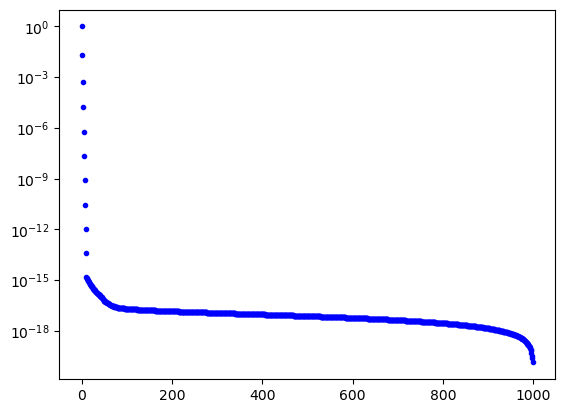

In [4]:
# complexify sources and targets
targs_cmplx = np.random.uniform(R,R+1,N) + 1j*np.random.uniform(0,1,N);
src_cmplx = src[0,:] + 1j*src[1,:];

# Generate cauchy matrix
A = 1/np.subtract.outer(targs_cmplx,src_cmplx)

# Compute and plot singular value decomposition
S = np.linalg.svd(A,compute_uv=False)
plt.semilogy(S/S[0],'b.');